# Puzzle

https://thefiddler.substack.com/p/how-far-can-you-run-before-sundown

**This Week’s Fiddler**

From Ryan Goldenberg comes a puzzle inspired by an actual race he completed!

You’re participating in a trail run that ends at sundown at 7 p.m. There are four loops: 1 mile, 3 miles, 3.5 miles, and 4.5 miles. After completing any given loop, you are randomly assigned another loop to run—this next loop could be the same as the previous one you just ran, or it could be one of the other three. Being assigned your next loop doesn’t take a meaningful amount of time; assume all your time is spent running.

Your “score” in the race is the total distance you run among all completed loops you are assigned. If you’re still out on a loop at 7 p.m., any completed distance on that loop does not count toward your score!

It is now 5:55 p.m. and you have just completed a loop. So far, you’ve been running 10-minute miles the whole way. You’ll maintain that pace until 7 p.m.

On average, what score can you expect to earn between 5:55 p.m. and 7 p.m.?

**This Week’s Extra Credit**

From Ryan Goldenberg also comes some Extra Credit:

Now let’s add one more wrinkle. At some point during the race, if you’re unhappy with the loop you’ve just been randomly assigned, you’re granted a “mulligan,” allowing you to get another random assignment. (Note that there’s a 25 percent chance you’ll be assigned the same loop again.) You don’t have to use your mulligan, but you can’t use it more than once.

As before, the time is 5:55 p.m. You have just completed a loop, and you haven’t used your mulligan yet.

With an optimal strategy (i.e., using the mulligan at the right moment, if at all), on average, what score can you expect to earn between 5:55 p.m. and 7 p.m.?

# Fiddler Solution

The tidiest way I can think of to calculate this expected score is to use a recursive function, calculating the score based on the distance left. (Since our speed is fixed, we can just convert time left to distance left, and work in a single unit). The min score possible is 3, and the max score possible is 6.5, so the answer should be something in between, maybe 4.75 (average of 3 and 6.5)

In [14]:
from statistics import mean as average
from functools import cache
loops = [1, 3, 3.5, 4.5]
@cache
def F(distance_left=6.5, info=True): # F for fiddler.
    if distance_left <= 0:
        return 0
    expected_scores = []
    for loop in loops:
        if loop <= distance_left:
            expected_scores.append(loop + F(distance_left - loop, info))
        else:
            expected_scores.append(0)
    result = average(expected_scores) if expected_scores else 0
    if info:
        print(f"F({distance_left}) = {result}")
    return result

F(6.5)

F(0.5) = 0
F(1.5) = 0.25
F(2.5) = 0.3125
F(3.5) = 1.953125
F(1.0) = 0.25
F(4.5) = 3.61328125
F(2.0) = 0.3125
F(5.5) = 4.1220703125
F(3.0) = 1.078125
F(6.5) = 4.866455078125


4.866455078125

Okay, so the answer seems **4.866455078125**, which is not far from the guess of 4.75.

---



# Extra Credit Solution

I think we can proceed along similar lines, but we need to keep track of the mulligan as well. I think for optimal mulligan decisions, at each point, we need to calculate the expected scores using the mulligan and not using the mulligan, and then use the mulligan for the loops where the average score using the mulligan is better than the loop-specific score not using the mulligan.


In [15]:
@cache
def E(distance_left=6.5, mulligan_left=1, info=True): # E for extra credit.
    if distance_left <= 0:
        return 0
    # Calculate expected scores using mulligan
    if mulligan_left > 0:
        expected_scores_using_mulligan = []
        for loop in loops:
            if loop <= distance_left:
                expected_scores_using_mulligan.append(loop + E(distance_left - loop, mulligan_left - 1, info))
            else:
                expected_scores_using_mulligan.append(0)
        average_score_using_mulligan = average(expected_scores_using_mulligan) if expected_scores_using_mulligan else 0
    # Calculate expected scores not using mulligan
    expected_scores_not_using_mulligan = []
    for loop in loops:
        if loop <= distance_left:
            expected_scores_not_using_mulligan.append(loop + E(distance_left - loop, mulligan_left, info))
        else:
            expected_scores_not_using_mulligan.append(0)
    average_score_not_using_mulligan = average(expected_scores_not_using_mulligan) if expected_scores_not_using_mulligan else 0
    # Combine into a result
    if mulligan_left <= 0:
        result = average_score_not_using_mulligan
    else:
        expected_scores_combined = []
        for i in range(len(loops)):
            if expected_scores_not_using_mulligan[i] < average_score_using_mulligan:
                expected_scores_combined.append(average_score_using_mulligan)
                if info:
                    print (f"  Using mulligan for loop {loops[i]} at distance {distance_left} left")
            else:
                expected_scores_combined.append(expected_scores_not_using_mulligan[i])
        result = average(expected_scores_combined) if expected_scores_combined else 0
    if (info):
        print(f"E({distance_left}, {mulligan_left}) = {result}")
    return result

E(6.5, 1)

E(0.5, 0) = 0
E(1.5, 0) = 0.25
E(2.5, 0) = 0.3125
E(3.5, 0) = 1.953125
E(1.0, 0) = 0.25
E(4.5, 0) = 3.61328125
E(2.0, 0) = 0.3125
E(5.5, 0) = 4.1220703125
E(3.0, 0) = 1.078125
E(0.5, 1) = 0
  Using mulligan for loop 3 at distance 1.5 left
  Using mulligan for loop 3.5 at distance 1.5 left
  Using mulligan for loop 4.5 at distance 1.5 left
E(1.5, 1) = 0.4375
  Using mulligan for loop 3 at distance 2.5 left
  Using mulligan for loop 3.5 at distance 2.5 left
  Using mulligan for loop 4.5 at distance 2.5 left
E(2.5, 1) = 0.59375
  Using mulligan for loop 1 at distance 3.5 left
  Using mulligan for loop 4.5 at distance 3.5 left
E(3.5, 1) = 2.6015625
  Using mulligan for loop 3 at distance 1.0 left
  Using mulligan for loop 3.5 at distance 1.0 left
  Using mulligan for loop 4.5 at distance 1.0 left
E(1.0, 1) = 0.4375
  Using mulligan for loop 1 at distance 4.5 left
  Using mulligan for loop 3 at distance 4.5 left
E(4.5, 1) = 3.916015625
  Using mulligan for loop 3 at distance 2.0 left
  Usin

5.351806640625

Looks like the result for the extra credit is **5.351806640625**, a healthy improvement over the 4.866455078125 from the based fiddler.

There are some interesting mulligan choices in there. 

For example, the situation where loop 1 is picked with distance 4.5 left:
<pre>
  Using mulligan for loop 1 at distance 4.5 left
  E(3.5, 1) = 2.6015625
  E(4.5, 0) = 3.61328125
</pre>  No mulligan (rolling with 1) would yield expected score 3.6016, while using the mulligan yields 3.6133, very slightly better.


---

# Plots

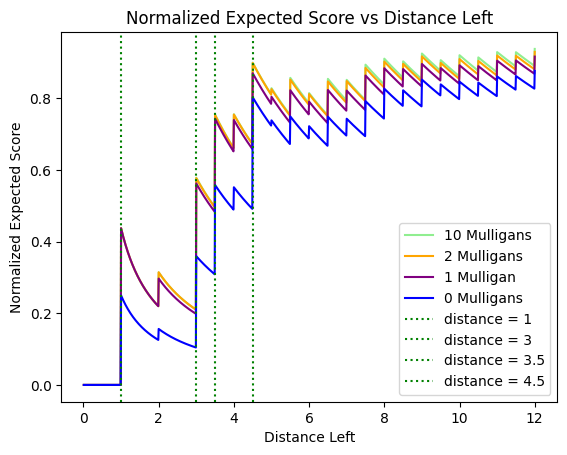

In [16]:
import matplotlib.pyplot as plt

x = [j*0.01 for j in range(1,12*100+1)]
y_0 = [F(i, info=False)/i for i in x]
y_1 = [E(i, 1, info=False)/i for i in x]
y_2 = [E(i, 2, info=False)/i for i in x]
y_10 = [E(i, 10, info=False)/i for i in x]

plt.plot(x, y_10, label='10 Mulligans', color='lightgreen')
plt.plot(x, y_2, label='2 Mulligans', color='orange')
plt.plot(x, y_1, label='1 Mulligan', color='purple')
plt.plot(x, y_0, label='0 Mulligans', color='blue')

for loop in loops:
    plt.axvline(x=loop, color='g', linestyle=':', label=f"distance = {loop}")

plt.xlabel('Distance Left')
plt.ylabel('Normalized Expected Score')
plt.title('Normalized Expected Score vs Distance Left')
plt.legend()
plt.show()

Major changes line up with the distance hitting the lengths of the loops.